In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [2]:
url="https://raw.githubusercontent.com/nlihin/data-analytics/main/datasets/youtube/youtube_US_short.csv"

In [3]:
youtube_df = pd.read_csv("https://raw.githubusercontent.com/nlihin/data-analytics/main/datasets/youtube/youtube_US_short.csv")

In [4]:
youtube_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [5]:
youtube_df["views"].argmax()

6181

In [6]:
youtube_df["views"].max()

149376127

In [7]:
youtube_max_views = youtube_df[["views","publish_time","title"]]

In [8]:
youtube_max_views.iloc[6181:6182]

,views,publish_time,title
6181,149376127,2017-12-06T17:58:51.000Z,YouTube Rewind: The Shape of 2017 | #YouTubeRe...


# 2 

In [9]:
youtube_df.sort_values("views", ascending=False)[:3][['channel_title','views']]

,channel_title,views
6181,YouTube Spotlight,149376127
5935,YouTube Spotlight,137843120
5699,YouTube Spotlight,125432237


# 3

In [10]:
 cor = youtube_df[['comment_count','views','dislikes','likes']].corr(method='spearman')
cor

,comment_count,views,dislikes,likes
comment_count,1.000000,0.840532,0.843331,0.881849
views,0.840532,1.000000,0.866979,0.877789
dislikes,0.843331,0.866979,1.000000,0.801154
likes,0.881849,0.877789,0.801154,1.000000


# 4

In [11]:
cor.style.background_gradient(cmap='Blues')

,comment_count,views,dislikes,likes
comment_count,1.000000,0.840532,0.843331,0.881849
views,0.840532,1.000000,0.866979,0.877789
dislikes,0.843331,0.866979,1.000000,0.801154
likes,0.881849,0.877789,0.801154,1.000000


# 5

<AxesSubplot:xlabel='likes', ylabel='views'>

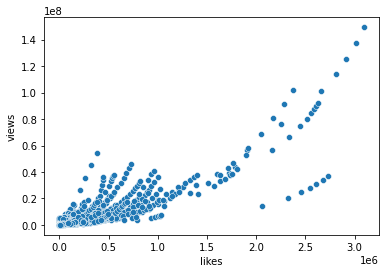

In [12]:
sns.scatterplot(data=youtube_df, x='likes', y='views')

<AxesSubplot:xlabel='likes', ylabel='comment_count'>

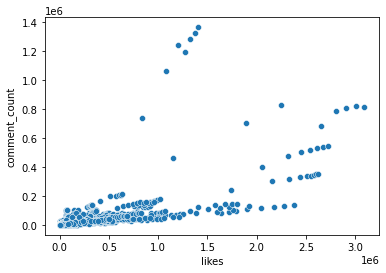

In [13]:
sns.scatterplot(data=youtube_df, x='likes', y='comment_count')

In [14]:
youtube_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12845 entries, 0 to 12844
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                12845 non-null  object
 1   trending_date           12845 non-null  object
 2   title                   12845 non-null  object
 3   channel_title           12845 non-null  object
 4   category_id             12845 non-null  int64 
 5   publish_time            12845 non-null  object
 6   tags                    12845 non-null  object
 7   views                   12845 non-null  int64 
 8   likes                   12845 non-null  int64 
 9   dislikes                12845 non-null  int64 
 10  comment_count           12845 non-null  int64 
 11  thumbnail_link          12845 non-null  object
 12  comments_disabled       12845 non-null  bool  
 13  ratings_disabled        12845 non-null  bool  
 14  video_error_or_removed  12845 non-null  bool  
 15  de

In [15]:
youtube_df['date'] = pd.to_datetime(youtube_df['publish_time'])
youtube_df['year'] = pd.DatetimeIndex(youtube_df['date']).year

In [16]:
youtube_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12845 entries, 0 to 12844
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   video_id                12845 non-null  object             
 1   trending_date           12845 non-null  object             
 2   title                   12845 non-null  object             
 3   channel_title           12845 non-null  object             
 4   category_id             12845 non-null  int64              
 5   publish_time            12845 non-null  object             
 6   tags                    12845 non-null  object             
 7   views                   12845 non-null  int64              
 8   likes                   12845 non-null  int64              
 9   dislikes                12845 non-null  int64              
 10  comment_count           12845 non-null  int64              
 11  thumbnail_link          12845 non-null  o

In [17]:
#youtube_by_yaer = youtube_df.groupby(["category_id","year"])[["views"]].sum()
#youtube_by_yaer.loc[youtube_by_yaer.year == 2017]

In [20]:
the_2017 = youtube_df.loc[(youtube_df.year == 2017)]
the_2017

NotImplementedError: iLocation based boolean indexing on an integer type is not available

In [19]:
the_2017.groupby("category_id")[["views"]].sum()

,views
category_id,
1,865461513
2,78853521
10,4504741345
15,144245930
17,381243186
19,54291438
20,50354420
22,701825770
23,1130781734
